# Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step1: Loading data set

In [19]:
data = pd.read_csv('hotel_bookings 2.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Step 2: Data exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
data.shape

(119390, 32)

In [3]:
data.describe()

NameError: name 'data' is not defined

### Meaningful sensences to decribe the statistical findings.
1. 37.046% of reservation cancelled which is a significant portion with an implication to revenue management and resource implications.
2. Only about 10% of bookings are from repeated guests,  which show a need for focus on marketing and customer retention efforts.
3. The majority of bookings are for one or two adults, with fewer bookings including children or babies.
4. On average, guests stay around 0.93 weekend nights and 2.5 week nights which indicates that guests tend to stay longer during weekdays than weekends, which could be useful for capacity planning and pricing strategies.
5. The average daily rate is approximately 101.83 units, with a standard deviation of approximately 50.54 units.
6. On average, there are around 0.14 booking changes per booking.Understanding the reasons for changes could help improve the booking process and customer satisfaction.

# Step 3 : Data cleaning

### Convert to datetime

In [37]:
data ['reservation_status_date'] = pd.to_datetime(data ['reservation_status_date'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
 for col in data.describe(include ='object').columns:
    print(col)
    print(data[col].unique())
    

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

### Finding the null values

In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Drop the null values

In [11]:
data.drop(['company','agent'], axis=1, inplace =True)

In [13]:
data.dropna(inplace =True)

In [14]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Step 4 : Data visualization

## Cancelled percentage table and graph

In [15]:
cancelled_perc =data['is_canceled'].value_counts()
cancelled_perc

0    74745
1    44153
Name: is_canceled, dtype: int64

In [16]:
cancelled_perc =data['is_canceled'].value_counts(normalize=True)
cancelled_perc

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

<BarContainer object of 2 artists>

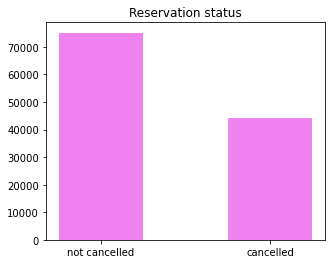

In [20]:
plt.figure(figsize=(5,4))
plt.title('Reservation status')
plt.bar(['not cancelled','cancelled'],data['is_canceled'].value_counts(),color = "violet", width =0.5)

## Reservation status in different hotels table and graph

In [24]:
resort_hotel=(data[data['hotel'] =='Resort Hotel'])
resort_hotel['is_canceled'].value_counts(normalize= True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [25]:
city_hotel=(data[data['hotel'] =='City Hotel'])
city_hotel['is_canceled'].value_counts(normalize= True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

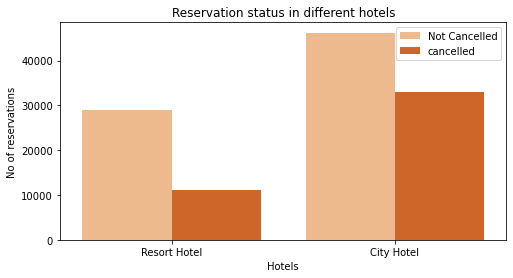

In [28]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=data, palette='Oranges')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels')
plt.xlabel('Hotels')
plt.ylabel('No of reservations')
plt.legend(['Not Cancelled','cancelled'])
plt.show()

 ##### City hotels had a higher number of cancelled bookings.

## Average dairy rate in resort and city hotels tables and graphs

In [31]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
1/1/2015,61.966667
1/1/2016,122.366111
1/1/2017,200.999714
1/10/2015,66.102667
1/10/2016,103.119286
...,...
9/8/2016,187.970000
9/8/2017,223.363143
9/9/2015,99.663889


In [30]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
1/1/2015,62.063158
1/1/2016,88.789012
1/1/2017,136.583418
1/10/2015,96.434302
1/10/2016,119.083803
...,...
9/8/2015,75.363061
9/8/2016,121.474333
9/8/2017,137.492099


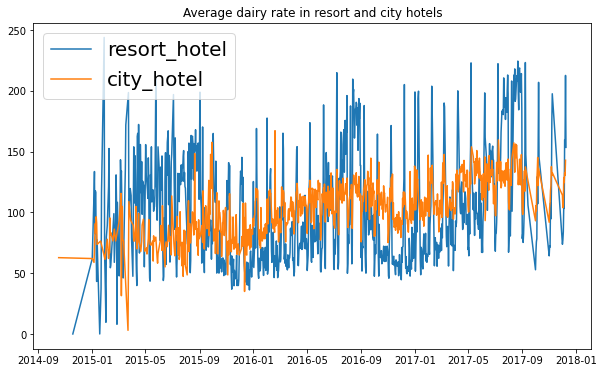

In [91]:
plt.figure(figsize=(10,6))
plt.title('Average dairy rate in resort and city hotels')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='resort_hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city_hotel')
plt.legend(fontsize= 20)
plt.show()
           

##### Average dairy rate for Resort hotels is higher than the average daily rate for city hotels

## Reservation Status per month table and graph

In [41]:
data[data['is_canceled']==1].groupby('month')[['adr']].sum()

,adr
month,
1,532672.54
2,404855.98
3,419566.59
4,399433.20
5,343319.69
6,469422.91
7,388084.73
8,297051.25
9,341393.89


In [45]:
data[data['is_canceled']==0].groupby('month')[['adr']].sum()

,adr
month,
1,422984.67
2,507232.85
3,563457.80
4,624192.71
5,708412.50
6,660417.68
7,873781.88
8,1028611.38
9,682874.85


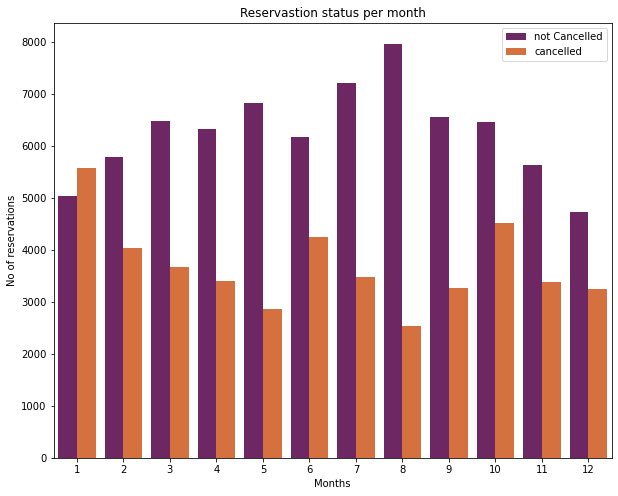

In [44]:
data['month']= data['reservation_status_date'].dt.month
plt.figure(figsize=(10,8))
plt.title('Reservastion status per month')                    
ax1 = sns.countplot(x='month', hue='is_canceled', data=data, palette='inferno')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Months')
plt.ylabel('No of reservations')
plt.legend(['not Cancelled','cancelled'])
plt.show()
                   

##### Month 1 had higher rate of canceled reserversations compared to not canceled ones.

## Average daily rate on each month of reservations

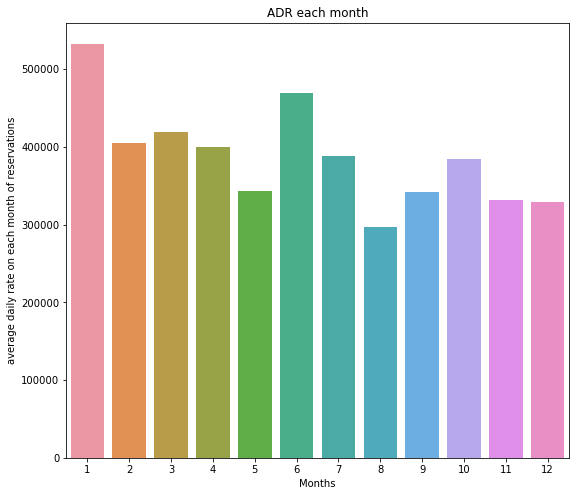

In [40]:
plt.figure(figsize=(9,8))
plt.title('ADR each month')                    
sns.barplot('month','adr', data=data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Months')
plt.ylabel('average daily rate on each month of reservations')
plt.show()
           

## Top 10 countries with reservation cancelled

In [121]:
cancelled_data= data[data['is_canceled']==1]
cancelled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25,4
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-06,5
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17,7


In [50]:
top_10_country = data['country'].value_counts()[:10]
top_10_country


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

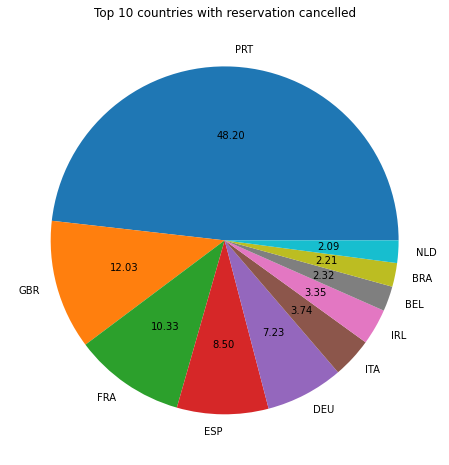

In [51]:
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country,autopct= '%.2f',labels =top_10_country.index)
plt.show()
           

##### Portugal had the highest cancelation rate

## Market segments with most bookings

In [52]:
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [55]:
cancelled_data= data[data['is_canceled']==1]
cancelled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25,4
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-06,5
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17,7


In [58]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: market_segment, dtype: float64

In [59]:
not_cancelled_data= data[data['is_canceled']==0]
not_cancelled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-06-09,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-07-09,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-07-09,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-07-09,7


## average dairy rate in canceled and not canceled reservations

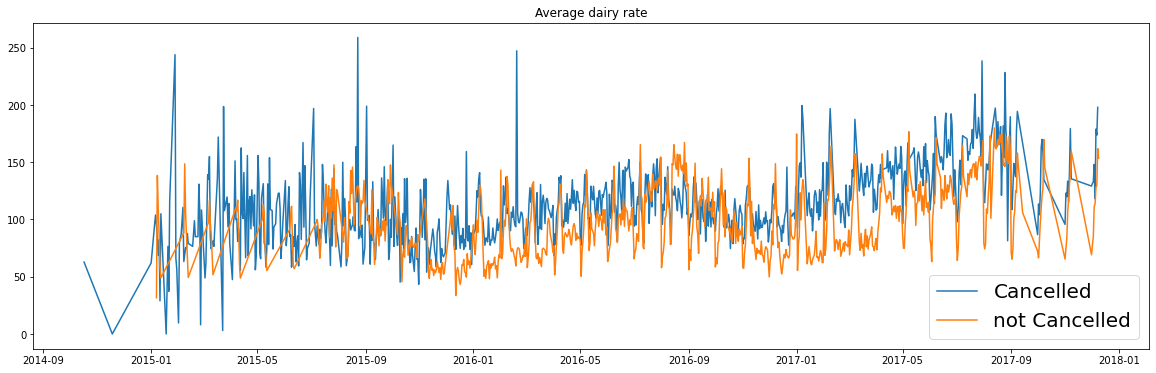

In [66]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace =True)
cancelled_data_adr.sort_values(('reservation_status_date'),inplace=True)

not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace =True)
not_cancelled_data_adr.sort_values(('reservation_status_date'),inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average dairy rate')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='Cancelled')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not Cancelled')
plt.legend(fontsize= 20)
plt.show()
           

In [168]:
cancelled_data_adr_filtred= cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016')&(cancelled_data_adr['reservation_status_date']<'2017')]
not_cancelled_data_adr_filtred= not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016')&(not_cancelled_data_adr['reservation_status_date']<'2017')]

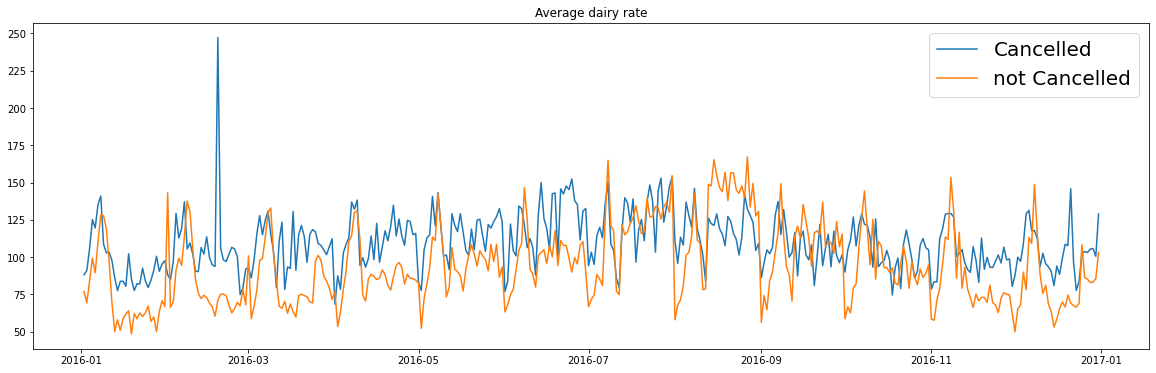

In [169]:

plt.figure(figsize=(20,6))
plt.title('Average dairy rate')
plt.plot(cancelled_data_adr_filtred['reservation_status_date'],cancelled_data_adr_filtred['adr'],label='Cancelled')
plt.plot(not_cancelled_data_adr_filtred['reservation_status_date'],not_cancelled_data_adr_filtred['adr'],label='not Cancelled')
plt.legend(fontsize= 20)
plt.show()
           